In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


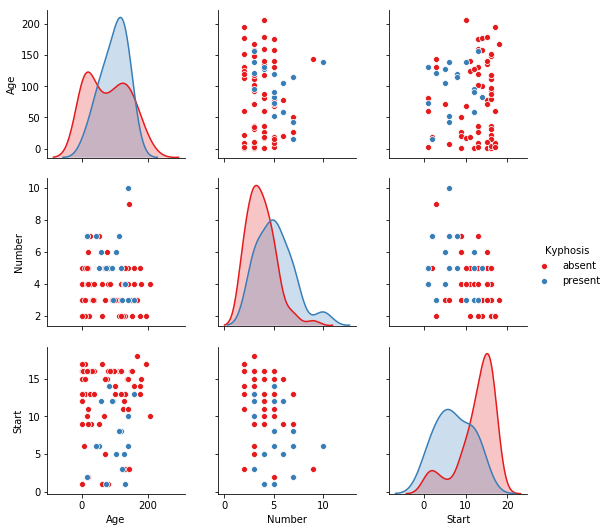

In [3]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree=DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
predictions=dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.87      0.93        23
     present       0.40      1.00      0.57         2

   micro avg       0.88      0.88      0.88        25
   macro avg       0.70      0.93      0.75        25
weighted avg       0.95      0.88      0.90        25



In [13]:
print(confusion_matrix(y_test,predictions))

[[20  3]
 [ 0  2]]


In [18]:
from Ipython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot



ModuleNotFoundError: No module named 'Ipython'

In [17]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [19]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

NameError: name 'StringIO' is not defined

In [20]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [23]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

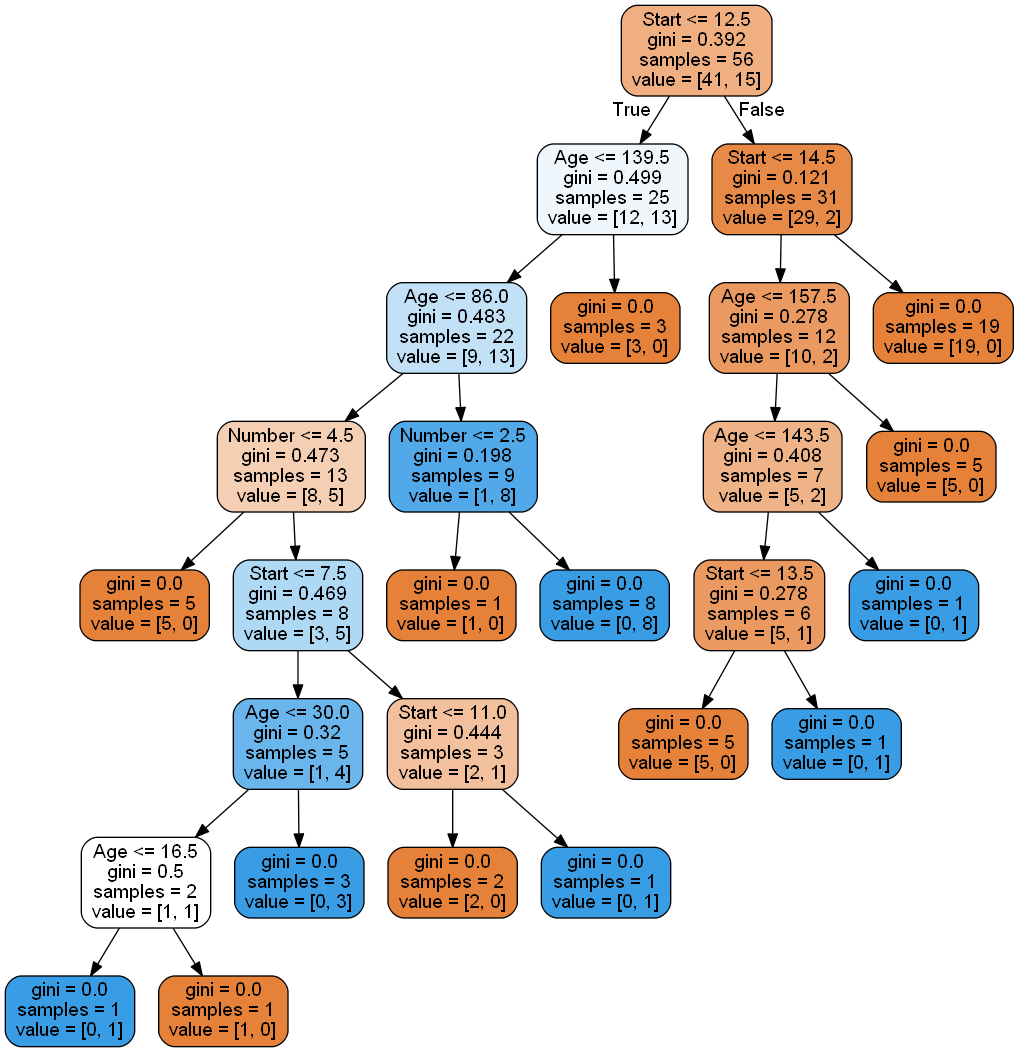

In [28]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)